In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Raw_Housing_Prices.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [3]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


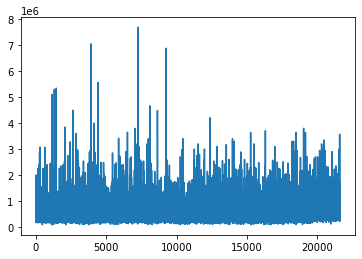

In [4]:
plt.plot(df["Sale Price"])


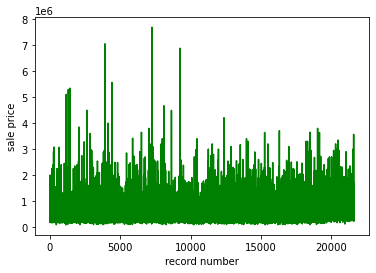

In [5]:
plt.plot(df["Sale Price"],color = "green")
plt.xlabel("record number")
plt.ylabel("sale price")
plt.show()

In [6]:
q1 = df['Sale Price'].quantile(.25)
q3 = df["Sale Price"].quantile(.75)
iqr = q3-q1
upper_limit = q3 + (1.5*iqr)
lower_limit  = q1- (1.5*iqr)
upper_limit,lower_limit

(1129575.0, -162625.0)

In [7]:
def limit_imputer(price):
    if price  > upper_limit:
        return upper_limit
    if price < lower_limit:
        return lower_limit
    else:
        return price


In [8]:
df['Sale Price'] = df['Sale Price'].apply(limit_imputer)

In [9]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.116186e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,2.500620e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.dropna(inplace = True , axis = 0 ,subset = ['Sale Price'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

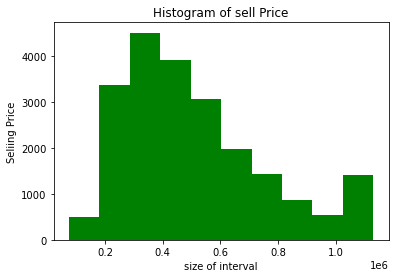

In [12]:
plt.hist(df['Sale Price'] , bins  =10 , color = 'green')
plt.xlabel("size of interval")
plt.ylabel('Seliing Price')
plt.title('Histogram of sell Price')
plt.show()

In [13]:
numerical_column = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)'
                    ,'Area of the House from Basement (in Sqft)','Zipcode','Latitude','Longitude','Lot Area after Renovation (in Sqft)']

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy  = 'median')
df[numerical_column] = imputer.fit_transform(df[numerical_column])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [16]:
imputer  = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')
columns = df['Living Area after Renovation (in Sqft)'].values.reshape(-1,1) 
df['Living Area after Renovation (in Sqft)']= imputer.fit_transform(columns)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [17]:
df['Zipcode']= df['Zipcode'].astype(object)

In [18]:
df.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [19]:
df['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [20]:
mapping =  {'None':'0','Once':'1','Twice':'2','Thrice' : '3','Four':'4'}

In [21]:
df['No of Times Visited'] = df['No of Times Visited'].map(mapping)

In [22]:
df['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [23]:
df['ever renovated'] =np.where( df['Renovated Year']==0 ,'No','Yes')

In [24]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650.0,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639.0,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062.0,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000.0,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503.0,No


In [25]:
df['purchasing_year'] = pd.DatetimeIndex(df['Date House was Sold']).year

In [26]:
diff = abs(df['purchasing_year']-df['Renovated Year'])
diff

0        2017
1          26
2        2016
3        2017
4        2016
         ... 
21608    2017
21609    2016
21610    2017
21611    2016
21612    2017
Length: 21609, dtype: int64

In [27]:
df['year since renovation'] = np.where(df['ever renovated']== 'Yes' ,diff , 0)

In [28]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever renovated,purchasing_year,year since renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650.0,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639.0,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062.0,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000.0,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503.0,No,2016,0


In [29]:
df.drop(columns = ['purchasing_year','Date House was Sold','ever renovated'],inplace = True)

In [30]:
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),year since renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650.0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639.0,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062.0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000.0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503.0,0


In [31]:
df.drop(columns = ['ID'] ).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),year since renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.680914,0.606527,0.307513,-0.064306,0.122021,0.402430,0.045401,0.629948,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,0.018861,-0.008708,0.129569,0.391776,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,0.050761,0.024570,0.223171,0.568546,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,0.055380,0.052538,0.240091,0.756178,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,0.007634,-0.085719,0.229449,0.144509,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,0.006376,0.049692,0.125620,0.280084,-0.011204,-0.000901
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,0.010436,0.111226,0.201736,0.681349,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,0.023308,-0.000819,0.343793,0.731982,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.071328,0.110451,-0.144822,0.200314,0.017263,0.029158
Age of House (in Years),-0.064306,-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,-0.456711,-0.423848,0.133072,1.000000,0.224861,0.148083,-0.409515,-0.326276,-0.071016,0.203375


In [32]:
df.drop(columns = ['ID'], inplace =True)

In [33]:
df['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

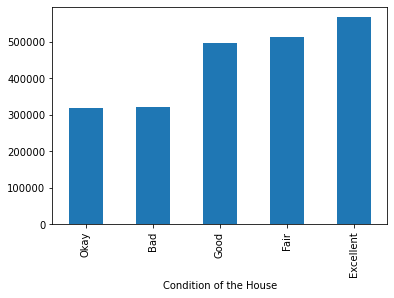

In [34]:
df.groupby('Condition of the House'
          ,)['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Waterfront View'>

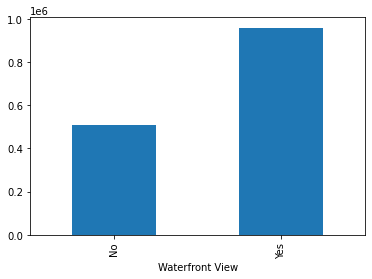

In [35]:
df.groupby('Waterfront View'
          ,)['Sale Price'].mean().sort_values().plot(kind = 'bar')

In [36]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [37]:
df = df.rename(columns = {'Sale Price' : 'Sale_Price'})
df = df.rename(columns = {"Condition of the House" :"Condition_of_the_House"})
df = df.rename(columns = {"Waterfront View" : "Waterfront_View"})

In [38]:
mod = ols('Sale_Price~Condition_of_the_House' , data = df).fit()
mod

In [39]:
annova_table = sm.stats.anova_lm(mod, type =2)

In [40]:
print(annova_table)

                             df        sum_sq       mean_sq         F  \
Condition_of_the_House      4.0  1.441831e+13  3.604579e+12  58.25563   
Residual                21604.0  1.336752e+15  6.187520e+10       NaN   

                              PR(>F)  
Condition_of_the_House  5.447605e-49  
Residual                         NaN  


In [41]:
mod = ols('Sale_Price ~ Waterfront_View' ,data = df).fit()
anova_table = sm.stats.anova_lm(mod , type = 2)
print(anova_table)

                      df        sum_sq       mean_sq           F  \
Waterfront_View      1.0  3.283737e+13  3.283737e+13  538.192683   
Residual         21607.0  1.318333e+15  6.101415e+10         NaN   

                        PR(>F)  
Waterfront_View  1.275558e-117  
Residual                   NaN  


In [42]:
df =pd.get_dummies(df , columns = ['Condition_of_the_House'], drop_first = True )

In [43]:
df = pd.get_dummies(df, columns = ['Waterfront_View'] , drop_first = True)

In [44]:
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),year since renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,47.5112,-122.257,1340.0,5650.0,0,0,1,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,47.7210,-122.319,1690.0,7639.0,26,0,1,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,47.7379,-122.233,2720.0,8062.0,0,0,1,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,47.5208,-122.393,1360.0,5000.0,0,1,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,47.6168,-122.045,1800.0,7503.0,0,0,1,0,0,0


In [45]:
ziptable = df.groupby('Zipcode').agg({'Sale_Price' : 'mean'}).sort_values('Sale_Price' , ascending = True)

In [46]:
ziptable.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [47]:
ziptable['zipcode_group'] = pd.cut(ziptable['Sale_Price'],bins = 10 , labels = ['zip_code_0','zip_code_1','zip_code_2','zip_code_3','zip_code_4'
                                                                               ,'zip_code_5','zip_code_6','zip_code_7','zip_code_8','zip_code_9'],include_lowest = True)

In [48]:
ziptable.drop(columns = 'Sale_Price' ,inplace = True)

In [49]:
new_data = pd.merge(df , ziptable , left_on = 'Zipcode' , how = 'left' ,right_index = True)
new_data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),year since renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,zipcode_group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650.0,0,0,1,0,0,0,zip_code_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639.0,26,0,1,0,0,0,zip_code_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062.0,0,0,1,0,0,0,zip_code_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000.0,0,1,0,0,0,0,zip_code_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503.0,0,0,1,0,0,0,zip_code_4


In [50]:
new_data = new_data.drop(columns  = 'Zipcode')

In [51]:
new_data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),year since renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,zipcode_group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650.0,0,0,1,0,0,0,zip_code_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639.0,26,0,1,0,0,0,zip_code_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062.0,0,0,1,0,0,0,zip_code_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000.0,0,1,0,0,0,0,zip_code_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503.0,0,0,1,0,0,0,zip_code_4


In [52]:
new_data = pd.get_dummies(new_data , columns = ['zipcode_group'] , drop_first = True)

In [53]:
new_data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,zipcode_group_zip_code_1,zipcode_group_zip_code_2,zipcode_group_zip_code_3,zipcode_group_zip_code_4,zipcode_group_zip_code_5,zipcode_group_zip_code_6,zipcode_group_zip_code_7,zipcode_group_zip_code_8,zipcode_group_zip_code_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [102]:
X = new_data.iloc[:,1:31]
m = len(X)
m


21609

In [103]:
Y = new_data.iloc[:,0]
n = len(Y)
n

21609

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size = 0.3)

In [112]:
X_train.shape
Y_test.shape

(6483,)

In [79]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()
X_train = scale.fit_transform(X_train)

In [80]:
X_test = scale.fit_transform(X_test)

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(X_train ,Y_train)

LinearRegression(normalize=True)

In [82]:
lr.coef_

array([ -4093.13230028,  11949.64970586, 110414.65481432,  11533.62762979,
         2813.35213224,  28077.10900015,  60911.98895012, -21038.84974006,
       -26545.57855711,  26449.52507911,  16091.36038428,  21331.77690801,
       -23319.30749702,  20446.3411001 ,  -1043.58627142, -10335.06526751,
        28728.33211041,  25406.93918443,  29011.37590945,   2127.1987032 ,
        10249.58269895,  13259.26494464,  35274.74472215,  63217.72372648,
        80505.67169948,  51919.20459435,  72685.07864028,  41989.8362928 ,
        69635.6912262 ,  21401.41428533])

In [111]:
prediction  = lr.predict(X_test)
lr.score(X_test , Y_test)
z = len(prediction)
z

6483

# Residuals

In [104]:
residuals = (prediction  - Y_test)
residuals_table =pd.DataFrame({'residuals': residuals ,'prediction' : prediction})
residuals_table= residuals_table.sort_values(by = 'prediction')


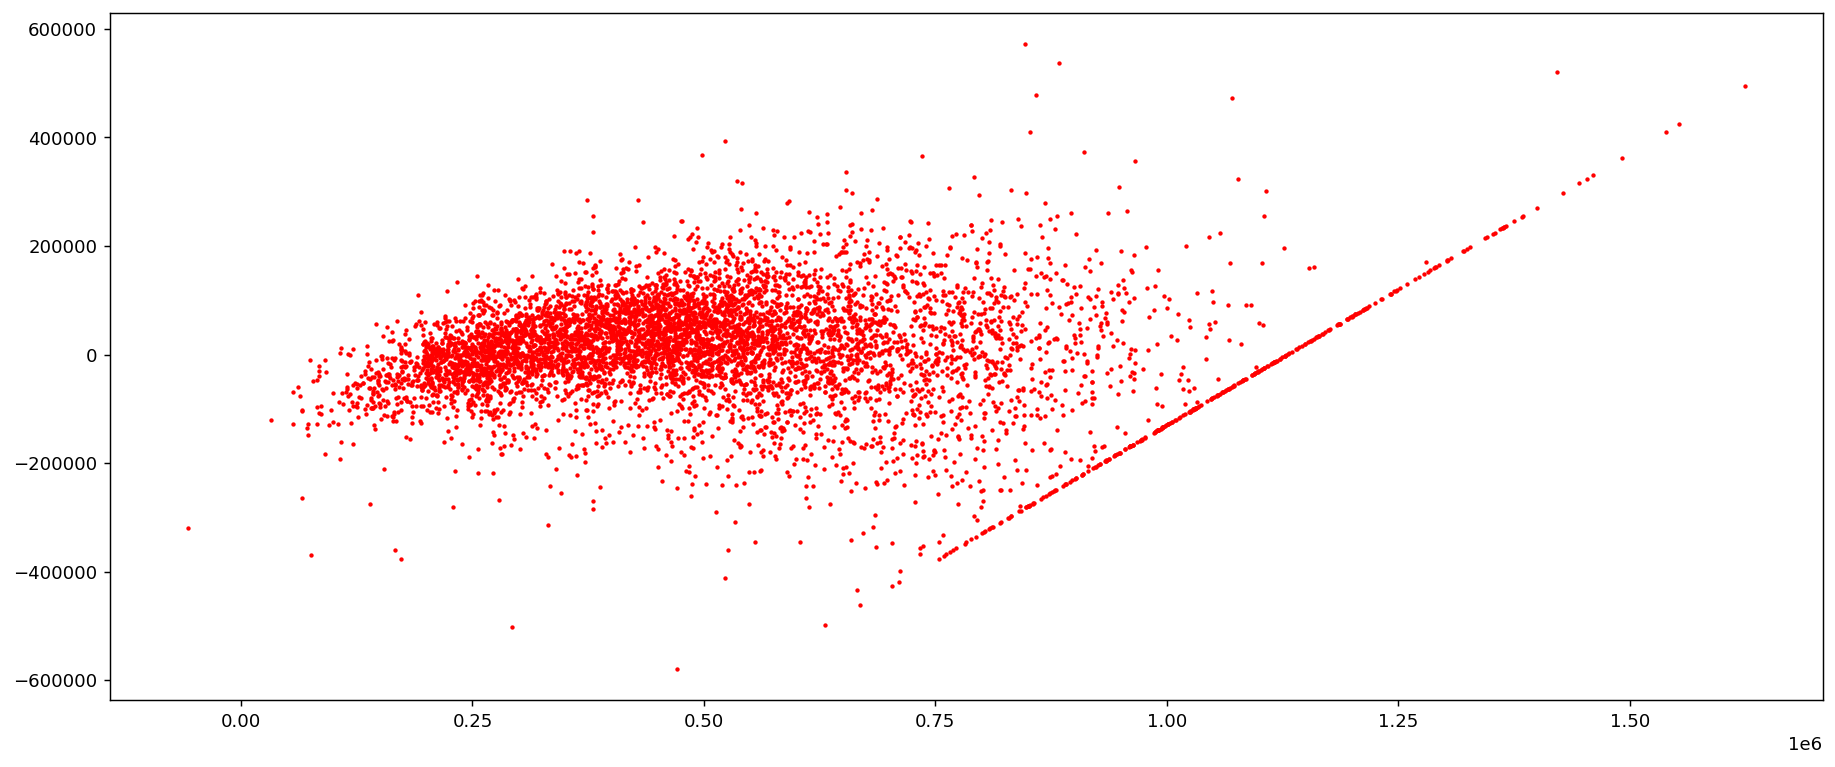

In [105]:
plt.figure(dpi = 130 ,figsize = (17,7))
plt.scatter(residuals_table['prediction'] , residuals_table['residuals'] , color  = 'red' ,s = 2)
plt.show()

# Distribution of errors 

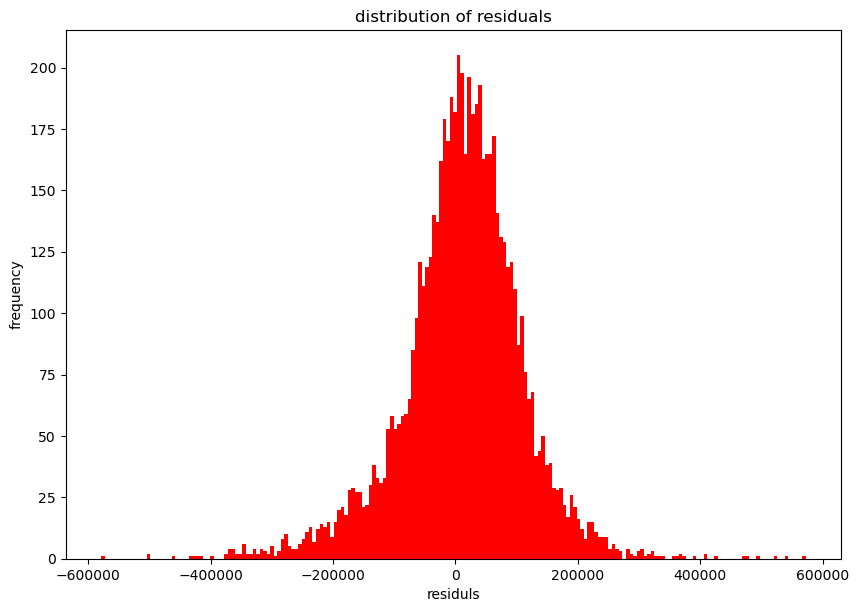

In [106]:
plt.figure(dpi = 100 , figsize = (10,7))
plt.hist(residuals_table['residuals'] , color = 'red' , bins = 200)
plt.xlabel('residuls')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# Forward selection